<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/BASE%20BIEN%20TESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.8 MB/s eta 0:00:00


In [2]:
!pip install pandas openpyxl linearmodels


In [5]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("PANEL BIEN 1.xlsx", sheet_name="Hoja1")

# Renombrar columnas
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']

# Eliminar filas con encabezados repetidos
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas a valores numéricos
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']].apply(pd.to_numeric)


In [6]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()


# Mostrar resumen de la regresión
results.summary


Dep. Variable:,RATIO_LIQUIDEZ,R-squared:,0.0756
Estimator:,PanelOLS,R-squared (Between):,0.1350
No. Observations:,1148,R-squared (Within):,0.0756
Date:,"Wed, May 21 2025",R-squared (Overall):,0.1086
Time:,04:39:28,Log-likelihood,-118.13
Cov. Estimator:,Unadjusted,,
,,F-statistic:,23.110
Entities:,14,P-value,0.0000
Avg Obs:,82.000,Distribution:,"F(4,1130)"
Min Obs:,82.000,,
Max Obs:,82.000,F-statistic (robust):,23.110


In [7]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]  # número total de observaciones
k = X.shape[1]  # número de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen y el RMSE
print(results.summary)
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")

                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        04:39:42   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

In [8]:
# Cargar el archivo Excel
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")

# Renombrar columnas
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']

# Eliminar filas con encabezados repetidos
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas a valores numéricos
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']].apply(pd.to_numeric)

from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]  # número total de observaciones
k = X.shape[1]  # número de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen y el RMSE
print(results.summary)
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        04:39:50   Log-likelihood                   -118.13
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             10.528
                            

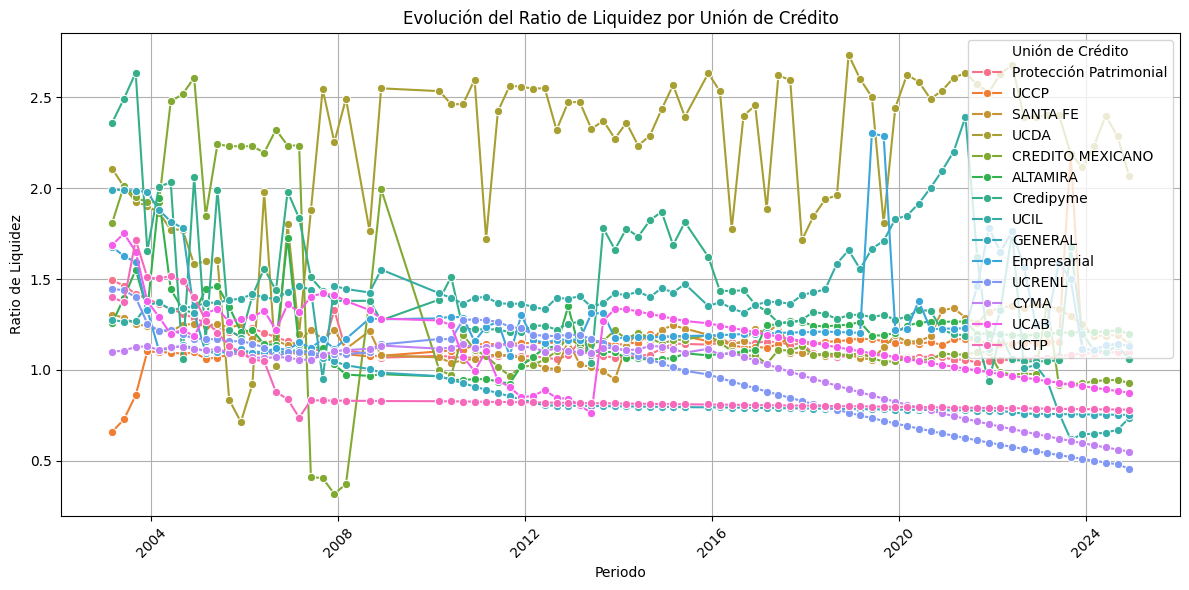

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir tipos de datos
df['PERIODO'] = pd.to_datetime(df['PERIODO'].astype(str), format='%Y%m')
df[['RATIO_LIQUIDEZ']] = df[['RATIO_LIQUIDEZ']].apply(pd.to_numeric)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='PERIODO', y='RATIO_LIQUIDEZ', hue='UNIONES', marker='o')

plt.title('Evolución del Ratio de Liquidez por Unión de Crédito')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.xticks(rotation=45)
plt.legend(title='Unión de Crédito')
plt.grid(True)
plt.tight_layout()
plt.show()


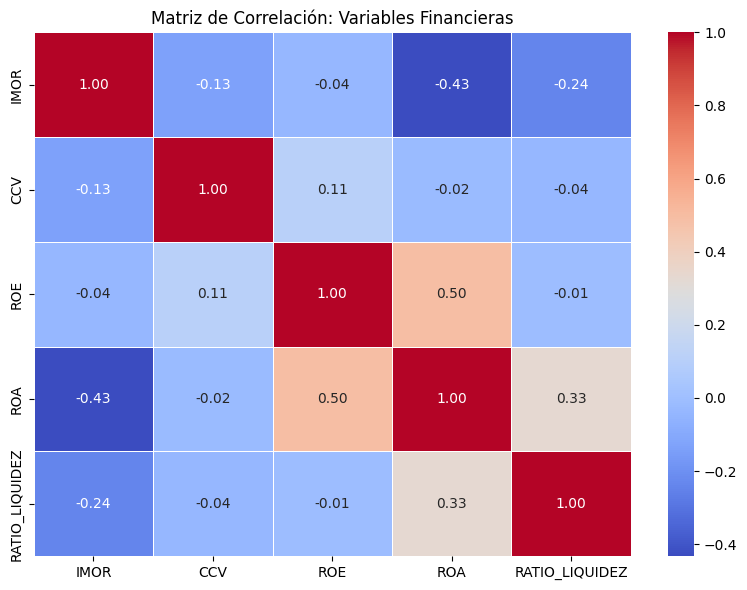

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'CCV', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas relevantes a numéricas
variables = ['IMOR', 'CCV', 'ROE', 'ROA', 'RATIO_LIQUIDEZ']
df[variables] = df[variables].apply(pd.to_numeric)

# Calcular matriz de correlación
correlation_matrix = df[variables].corr()

# Crear matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación: Variables Financieras')
plt.tight_layout()
plt.show()


In [11]:
from linearmodels.panel import compare

# Modelo con errores estándar clásicos
results_ols = model.fit(cov_type='unadjusted')

# Modelo con errores robustos agrupados
results_robust = model.fit(cov_type='clustered', cluster_entity=True)

# Comparación de ambos
print(compare({'Unadjusted': results_ols, 'Clustered': results_robust}))


                       Model Comparison                      
                                Unadjusted          Clustered
-------------------------------------------------------------
Dep. Variable               RATIO_LIQUIDEZ     RATIO_LIQUIDEZ
Estimator                         PanelOLS           PanelOLS
No. Observations                      1148               1148
Cov. Est.                       Unadjusted          Clustered
R-squared                           0.0756             0.0756
R-Squared (Within)                  0.0756             0.0756
R-Squared (Between)                 0.1350             0.1350
R-Squared (Overall)                 0.1086             0.1086
F-statistic                         23.110             23.110
P-value (F-stat)                    0.0000             0.0000
=====================     ================   ================
const                               1.3854             1.3854
                                  (58.648)           (26.510)
IMOR    

In [12]:
# Obtener residuos del modelo
df_panel['residuals'] = results_robust.resids

# Correlación de errores entre periodos para cada entidad
for entidad in df_panel.index.levels[0]:
    residuos = df_panel.loc[entidad]['residuals']
    autocor = residuos.autocorr()
    print(f"Autocorrelación en {entidad}: {autocor:.3f}")


Autocorrelación en ALTAMIRA: 0.717
Autocorrelación en CREDITO MEXICANO: 0.826
Autocorrelación en CYMA: 0.980
Autocorrelación en Credipyme: 0.474
Autocorrelación en Empresarial: 0.606
Autocorrelación en GENERAL: 0.973
Autocorrelación en Protección Patrimonial: 0.722
Autocorrelación en SANTA FE: 0.843
Autocorrelación en UCAB: 0.824
Autocorrelación en UCCP: 0.265
Autocorrelación en UCDA: 0.637
Autocorrelación en UCIL: 0.836
Autocorrelación en UCRENL: 0.960
Autocorrelación en UCTP: 0.890


In [13]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]  # número total de observaciones
k = X.shape[1]  # número de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen del modelo
print(results.summary)

# Mostrar el RMSE
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")

# Mostrar los intervalos de confianza del 95%
conf_int = results.conf_int(level=0.95)
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        04:40:53   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

In [14]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular la media del ratio de liquidez
media_ratio = Y.mean()

# Calcular el coeficiente de variación
coef_variacion = rmse / media_ratio

# Mostrar el resumen del modelo con coeficientes en %
print("\nResumen del modelo con coeficientes en puntos base (multiplicados por 100):\n")
params_percent = results.params * 100
print(params_percent)

# Mostrar RMSE y media del ratio
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")

# Mostrar coeficiente de variación
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Evaluación cualitativa
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Intervalos de confianza
conf_int = results.conf_int(level=0.95)
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)



Resumen del modelo con coeficientes en puntos base (multiplicados por 100):

const    138.540285
IMOR      -0.282102
CCV       -0.199355
ROE       -0.266032
ROA        1.768922
Name: parameter, dtype: float64

Error estándar de la regresión (RMSE): 0.2688
Media del ratio de liquidez: 1.2216
Coeficiente de variación (CV): 0.220025
👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.

Intervalos de confianza del 95 % para los coeficientes:
          lower     upper
const  1.339055  1.431751
IMOR  -0.003913 -0.001729
CCV   -0.002725 -0.001262
ROE   -0.004268 -0.001052
ROA    0.010273  0.025106


In [15]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np

# Establecer índice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error estándar de la regresión (RMSE)
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular la media del ratio de liquidez y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# Mostrar el resumen original del modelo
print(results.summary)

# Mostrar RMSE y coeficiente de variación
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Evaluación cualitativa
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar los coeficientes multiplicando IMOR, CCV, ROE, ROA por 100 (en puntos base)
print("\nCoeficientes del modelo (IMOR, CCV, ROE, ROA en puntos base):")
coef = results.params.copy()
coef['IMOR'] *= 100
coef['CCV'] *= 100
coef['ROE'] *= 100
coef['ROA'] *= 100
print(coef)

# Mostrar intervalos de confianza
conf_int = results.conf_int(level=0.95)
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)



                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        05:22:55   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

In [18]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Copiar resultados para modificar coeficientes
mod_results = results

# Variables a escalar por 100 (menos la constante)
scale_vars = ['IMOR', 'CCV', 'ROE', 'ROA']

# Escalar coeficientes, errores estándar, y límites de intervalo de confianza
mod_results.params[scale_vars] *= 100
mod_results.std_errors[scale_vars] *= 100
mod_results.tstats[scale_vars] = mod_results.params[scale_vars] / mod_results.std_errors[scale_vars]

# No se escala el p-value porque no cambia
# Escalar también los intervalos de confianza
conf_int_scaled = results.conf_int(level=0.95)
conf_int_scaled.loc[scale_vars] *= 100

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# Mostrar el resumen del modelo con coeficientes escalados
print(mod_results.summary)

# Mostrar métricas adicionales
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar intervalos de confianza con escalamiento reflejado
print("\nIntervalos de confianza del 95 % para los coeficientes (IMOR, CCV, ROE, ROA escalados):")
print(conf_int_scaled)


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        06:06:50   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             51.828
                            

In [19]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Crear copia de resultados para modificar solo los coeficientes
scaled_params = results.params.copy()
scaled_params[['IMOR', 'CCV', 'ROE', 'ROA']] *= 100

# Reemplazar los coeficientes escalados temporalmente en el objeto original solo para impresión
results._params = scaled_params  # sobreescribimos SOLO los coeficientes

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# Imprimir el summary del modelo con coeficientes escalados
print(results.summary)

# Imprimir métricas adicionales
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación del error
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")


                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Wed, May 21 2025   R-squared (Overall):              0.1086
Time:                        06:12:50   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):          2.311e+05
                            

In [21]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# ====== MODIFICAR SÓLO LOS COEFICIENTES PARA MOSTRARLOS EN EL SUMMARY ======
# Copiar resultados originales
params_scaled = results.params.copy()

# Multiplicar solo los coeficientes deseados
for var in ['IMOR', 'CCV', 'ROE', 'ROA']:
    params_scaled[var] *= 100

# Crear una tabla nueva con los valores originales, excepto los coeficientes escalados
summary_df = pd.DataFrame({
    'Parameter': params_scaled,
    'Std. Err.': results.std_errors,
    'T-stat': results.tstats,
    'P-value': results.pvalues,
    'Lower CI': results.conf_int().iloc[:, 0],
    'Upper CI': results.conf_int().iloc[:, 1]
})

# Imprimir el resumen como en el formato original
print("\n=====================  Parameter Estimates  =====================")
print(summary_df.to_string(float_format="{:.4f}".format))
print("=================================================================")

# Imprimir estadísticos adicionales
print(f"\nF-test for Poolability: {results.f_statistic.stat:.3f}")
print(f"P-value: {results.f_statistic.pval:.4f}")
print(f"Distribution: {results.f_statistic.dist_name}({int(results.f_statistic.df_denom)}, {int(results.f_statistic.df_num)})")

print("\nIncluded effects: Entity")
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar intervalos de confianza del 95 % por separado como en tu código original
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(results.conf_int(level=0.95))



=====================  Parameter Estimates  =====================
       Parameter  Std. Err.  T-stat  P-value  Lower CI  Upper CI
const     1.3854     0.0236 58.6485   0.0000    1.3391    1.4318
IMOR     -0.2821     0.0006 -5.0668   0.0000   -0.0039   -0.0017
CCV      -0.1994     0.0004 -5.3483   0.0000   -0.0027   -0.0013
ROE      -0.2660     0.0008 -3.2459   0.0012   -0.0043   -0.0011
ROA       1.7689     0.0038  4.6797   0.0000    0.0103    0.0251

F-test for Poolability: 23.110
P-value: 0.0000


AttributeError: 'WaldTestStatistic' object has no attribute 'df_num'

In [22]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer índice de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir variables
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'CCV', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Ajustar modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular RMSE
residuals = results.resids
n = residuals.shape[0]
k = X.shape[1]
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Calcular media y coeficiente de variación
media_ratio = Y.mean()
coef_variacion = rmse / media_ratio

# ====== MODIFICAR SÓLO LOS COEFICIENTES PARA MOSTRARLOS EN EL SUMMARY ======
# Copiar resultados originales
params_scaled = results.params.copy()

# Multiplicar solo los coeficientes deseados
for var in ['IMOR', 'CCV', 'ROE', 'ROA']:
    params_scaled[var] *= 100

# Crear una tabla nueva con los valores originales, excepto los coeficientes escalados
summary_df = pd.DataFrame({
    'Parameter': params_scaled,
    'Std. Err.': results.std_errors,
    'T-stat': results.tstats,
    'P-value': results.pvalues,
    'Lower CI': results.conf_int().iloc[:, 0],
    'Upper CI': results.conf_int().iloc[:, 1]
})

# Imprimir el resumen como en el formato original
print("\n=====================  Parameter Estimates  =====================")
print(summary_df.to_string(float_format="{:.4f}".format))
print("=================================================================")

# Imprimir estadísticos adicionales
print(f"\nF-test for Poolability: {results.f_statistic.stat:.3f}")
print(f"P-value: {results.f_statistic.pval:.4f}")

# Calculate numerator degrees of freedom manually
num_entities = df_panel.index.get_level_values('UNIONES').nunique()
f_df_num = num_entities - 1

# Use the calculated numerator degrees of freedom
print(f"Distribution: {results.f_statistic.dist_name}({int(results.f_statistic.df_denom)}, {int(f_df_num)})")


print("\nIncluded effects: Entity")
print(f"\nError estándar de la regresión (RMSE): {rmse:.4f}")
print(f"Media del ratio de liquidez: {media_ratio:.4f}")
print(f"Coeficiente de variación (CV): {coef_variacion:.6f}")

# Interpretación
if coef_variacion < 0.10:
    print("👉 El error es muy bajo respecto a la media: el modelo es bastante preciso.")
elif coef_variacion < 0.25:
    print("👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.")
else:
    print("👉 El error es relativamente alto respecto a la media: el modelo podría mejorar.")

# Mostrar intervalos de confianza del 95 % por separado como en tu código original
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(results.conf_int(level=0.95))


=====================  Parameter Estimates  =====================
       Parameter  Std. Err.  T-stat  P-value  Lower CI  Upper CI
const     1.3854     0.0236 58.6485   0.0000    1.3391    1.4318
IMOR     -0.2821     0.0006 -5.0668   0.0000   -0.0039   -0.0017
CCV      -0.1994     0.0004 -5.3483   0.0000   -0.0027   -0.0013
ROE      -0.2660     0.0008 -3.2459   0.0012   -0.0043   -0.0011
ROA       1.7689     0.0038  4.6797   0.0000    0.0103    0.0251

F-test for Poolability: 23.110
P-value: 0.0000
Distribution: F(4,1130)(1130, 13)

Included effects: Entity

Error estándar de la regresión (RMSE): 0.2688
Media del ratio de liquidez: 1.2216
Coeficiente de variación (CV): 0.220025
👉 El error es razonable respecto a la media: el modelo tiene buen ajuste.

Intervalos de confianza del 95 % para los coeficientes:
          lower     upper
const  1.339055  1.431751
IMOR  -0.003913 -0.001729
CCV   -0.002725 -0.001262
ROE   -0.004268 -0.001052
ROA    0.010273  0.025106


In [29]:
# Calcular intervalo de confianza de la media del ratio de liquidez
ic_inferior = media_ratio - 2 * rmse
ic_superior = media_ratio + 2 * rmse

print(f"\nIntervalo de confianza aproximado del 95 % para la media del ratio de liquidez:")
print(f"[{ic_inferior:.4f}, {ic_superior:.4f}]")



Intervalo de confianza aproximado del 95 % para la media del ratio de liquidez:
[0.6840, 1.7592]
